# Predicting Bike Rental Exercise

## Data
Using detailed data reported by Washington, DC on the number of bicycles people rent by hour and day. 

The columns are:
  * instant - A unique sequential ID number for each row
  * dteday - The date of the rentals
  * season - The season in which the rentals occurred
  * yr - The year the rentals occurred
  * mnth - The month the rentals occurred
  * hr - The hour the rentals occurred
  * holiday - Whether or not the day was a holiday
  * weekday - The day of the week (as a number, 0 to 7)
  * workingday - Whether or not the day was a working day
  * weathersit - The weather (as a categorical variable)
  * temp - The temperature, on a 0-1 scale
  * atemp - The adjusted temperature
  * hum - The humidity, on a 0-1 scale
  * windspeed - The wind speed, on a 0-1 scale
  * casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
  * registered - The number of registered riders (people who had already signed up)
  * cnt - The total number of bike rentals (casual + registered)

## Goal
Predict the total number of bikes people rented in a given hour using various machine learning techniques (linear regression, decision trees, random forests).

In [1]:
## Import the libraries and read the data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
%matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           1  0.22  0.2727  0.80     0.0000       8          32   40  
2           1  0.22  0.2727  0.80     0.0000       5          27   32  
3           1  0.24  0.2879  0.75     0.0000       3          10   13  
4           1  0.24  0.2879  0.75     0.0000       0           1    1  
5           2  0.24  0.2576  0.75     0.0896       0           1    1  
6           1  0.22  0.2727  0.80     0.0000       2           0    2  
7           1  0.20  0.2576  0.86     0.0000       1           2    3  
8           1  0.24  0.2879  0.75     0.0000       1           7    8  
9           1  0.32  0.3485  0.76     0.0000       8           6   14

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

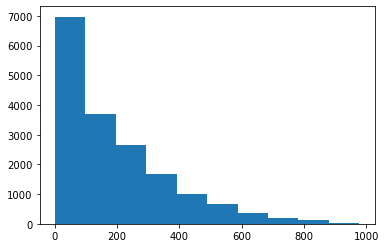

In [2]:
## Create a histogram of the cnt column

plt.hist(bike_rentals['cnt'])

In [3]:
## Display the correlation of each column to the cnt column

bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [4]:
## Create a function to convert the hours column (0-24) to a quarterly time of day as a numeric

def assign_label(hour):
    ## Represent 6-12 as 1 or morning
    if hour >= 6 and hour < 12:
        return 1
    ## Represent 12-18 as 2 or afternoon
    if hour >= 12 and hour < 18:
        return 2
    ## Represent 18-24 as 3 or evening
    if hour >= 18 and hour < 24:
        return 3
    ## Represent 0-6 as 4 or night
    if hour >= 0 and hour < 6:
        return 4

## Apply the assign_label function to the hr column and assign to time_label column
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Splitting the Data
We will use 80% of the data to train the models and the othere 20% to test. We'll use a random selection of rows for each.

In [5]:
## Taking a random selectiof of 80% of the rows and assigning them to the training data set.
train = bike_rentals.sample(frac=0.8)

## Find the other 20% and assign to test
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [6]:
## Create a list of columns for predictions
columns = list(train.columns)

## Remove columns from the list of predictors
columns.remove('cnt')
columns.remove('casual')
columns.remove('registered')
columns.remove('dteday')

## Linear Regression
Apply linear regression to predict the cnt column and measure the error.

In [7]:
## Apply Linear Regression to the training columns to predict test columns
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])

LinearRegression()

In [8]:
## Find the MSE from predicting the test columns using linear regression 
predictions = lr.predict(test[columns])
lr_error = np.mean((predictions - test['cnt']) ** 2)
lr_error

16575.48612998693

### Results from Linear Regression
The mean square error from linear regression is too high for predictions. 

## Decision Tree Regression
Apply decision tree regression to predict the cnt column and measure the error.

In [9]:
## Apply Decision Tree Regression to the training columns to predict test columns
## Setting the minimum samples leaf to 2
dtreg = DecisionTreeRegressor(min_samples_leaf=2)

dtreg.fit(train[columns], train['cnt'])

DecisionTreeRegressor(min_samples_leaf=2)

In [10]:
## Find the MSE from predicting the test columns using decision tree regression
dt_predictions = dtreg.predict(test[columns])

dt_error = np.mean((dt_predictions - test['cnt']) ** 2)
dt_error

2769.817918105099

### Results from Decision Tree Regression (minimum samples leaf of 2)
Results are much better than linear regression. Let's try a larger minimum sample leaf. 

In [11]:
## Setting the minimum samples leaf to 5
dtreg5 = DecisionTreeRegressor(min_samples_leaf=5)

dtreg5.fit(train[columns], train['cnt'])

DecisionTreeRegressor(min_samples_leaf=5)

In [12]:
## Find the MSE from predicting the test columns using decision tree regression
dt5_predictions = dtreg5.predict(test[columns])

dt5_error = np.mean((dt5_predictions - test['cnt']) ** 2)
dt5_error

2546.9024192658862

### Results from Decision Tree Regression (minimum samples leaf of 5)
Results are substantially improved by increasing the minimum samples leaf to 5. 

## Random Forest Regression
Apply random forest regression to predict the cnt column and measure the error.

In [13]:
## Apply Random Tree Regression to the training columns to predict test columns
rt_reg = RandomForestRegressor(min_samples_leaf=5)
rt_reg.fit(train[columns], train['cnt'])

RandomForestRegressor(min_samples_leaf=5)

In [14]:
## Find the MSE from predicting the test columns using random tree regression
rt_reg_predictions = rt_reg.predict(test[columns])

rt_error = np.mean((rt_reg_predictions - test['cnt']) ** 2)
rt_error

1822.4968218908477

### Results from Random Tree Regression
Random tree regression had the lowest error for predicting of all methods tested on this dataset. 